WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output file path
output_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

Perform API Calls

In [3]:
# Built url for API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_key}&units={units}&q="

# Lists to hold city data
number = int()
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

# For loop to grab city weather data with weather API
print(f"Beginning Data Retrieval")
print(f"--------------------")
for city in cities:
    number = number + 1
    
    # Exception to run through each city, collecting data and passing cities not found
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {number} | {city}")
    except:
        print(f"City not found. Skipping...")
        pass
print(f"--------------------")
print(f"Data Retrieval Complete")
print(f"--------------------")

Beginning Data Retrieval
--------------------
Processing Record 1 | guadalupe y calvo
Processing Record 2 | rikitea
Processing Record 3 | sola
Processing Record 4 | ribeira grande
Processing Record 5 | anadyr
Processing Record 6 | cape town
Processing Record 7 | geraldton
Processing Record 8 | ushuaia
City not found. Skipping...
Processing Record 10 | groningen
Processing Record 11 | waingapu
Processing Record 12 | kushva
Processing Record 13 | jinan
Processing Record 14 | hilo
Processing Record 15 | lompoc
Processing Record 16 | cicuco
Processing Record 17 | carnarvon
Processing Record 18 | bambous virieux
Processing Record 19 | dikson
Processing Record 20 | puerto ayora
Processing Record 21 | codrington
Processing Record 22 | ust-karsk
Processing Record 23 | mataura
Processing Record 24 | upernavik
Processing Record 25 | waddan
Processing Record 26 | gobabis
Processing Record 27 | ereymentau
Processing Record 28 | kodinsk
Processing Record 29 | namibe
Processing Record 30 | faanui
Pr

Processing Record 252 | saint george
Processing Record 253 | fereydun kenar
Processing Record 254 | esso
Processing Record 255 | tessalit
City not found. Skipping...
Processing Record 257 | kulhudhuffushi
City not found. Skipping...
City not found. Skipping...
Processing Record 260 | iquitos
Processing Record 261 | dudinka
Processing Record 262 | katsuura
Processing Record 263 | teeli
Processing Record 264 | fort nelson
Processing Record 265 | sanford
Processing Record 266 | khandbari
Processing Record 267 | canyon lake
Processing Record 268 | san juan
Processing Record 269 | broome
Processing Record 270 | bengkulu
Processing Record 271 | bonavista
Processing Record 272 | juegang
Processing Record 273 | aksarka
Processing Record 274 | zakamensk
Processing Record 275 | lavrentiya
City not found. Skipping...
Processing Record 277 | brownfield
Processing Record 278 | leningradskiy
Processing Record 279 | sterling
Processing Record 280 | sambava
Processing Record 281 | san rafael
Processin

Processing Record 504 | luba
Processing Record 505 | alekseyevsk
Processing Record 506 | mendeleyevsk
Processing Record 507 | catio
Processing Record 508 | palana
Processing Record 509 | santo anastacio
Processing Record 510 | erzin
Processing Record 511 | belaya gora
Processing Record 512 | cascais
Processing Record 513 | shingu
Processing Record 514 | kieta
Processing Record 515 | mitsamiouli
Processing Record 516 | high prairie
Processing Record 517 | pitanga
City not found. Skipping...
Processing Record 519 | muisne
Processing Record 520 | miracema do tocantins
Processing Record 521 | ordynskoye
Processing Record 522 | itacare
Processing Record 523 | shache
Processing Record 524 | kavaratti
Processing Record 525 | saint anthony
Processing Record 526 | doaba
Processing Record 527 | sur
Processing Record 528 | glamoc
Processing Record 529 | namie
Processing Record 530 | mbaiki
Processing Record 531 | maceio
Processing Record 532 | mizdah
Processing Record 533 | sobolevo
Processing Re

Convert Raw Data to DataFrame

In [4]:
# Create a dataframe and add city weather data
city_data = pd.DataFrame()

city_data['City'] = city_name
city_data['Lat'] = lat
city_data['Lng'] = lng
city_data['Max Temp'] = max_temp
city_data['Humidity'] = humidity
city_data['Cloudiness'] = clouds
city_data['Wind Speed'] = wind_speed
city_data['Country'] = country
city_data['Date'] = date

# Export city data to a csv
city_data.to_csv(output_file, encoding="utf-8", index=False)

# Visualize
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guadalupe y Calvo,26.10,-106.97,17.38,28,84,1.09,MX,1608492560
1,Rikitea,-23.12,-134.97,25.09,76,42,10.12,PF,1608492386
2,Sola,-13.88,167.55,26.00,94,75,6.10,VU,1608492560
3,Ribeira Grande,38.52,-28.70,18.00,93,75,9.30,PT,1608492560
4,Anadyr,64.75,177.48,-22.00,69,0,3.00,RU,1608492560


In [5]:
# Describe function to return city data stats
city_stats = city_data[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]]

city_stats.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,21.101216,18.342160,10.004664,74.940109,56.686025,3.553085,1.608493e+09
std,33.288346,91.255672,17.905870,19.619611,40.695246,2.597295,5.611886e+01
min,-54.800000,-179.170000,-43.000000,7.000000,0.000000,0.020000,1.608492e+09
25%,-5.225000,-63.030000,0.000000,67.000000,8.000000,1.500000,1.608493e+09
50%,25.520000,24.430000,15.000000,80.000000,75.000000,3.000000,1.608493e+09
75%,49.180000,92.135000,25.000000,89.000000,98.000000,4.690000,1.608493e+09
max,78.220000,179.320000,34.000000,100.000000,100.000000,16.180000,1.608493e+09


In [6]:
# Indices of cities that have humidity over 100%.
high_humidity = city_data.loc[city_data["Humidity"]> 100]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


Latitude vs. Temperature Plot

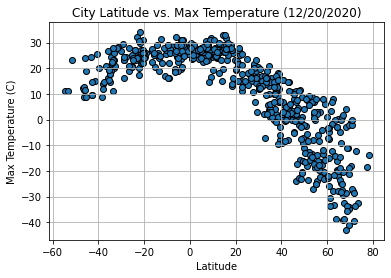

In [32]:
# Scatter plot for latitude vs max temp
x_values = city_data['Lat']
y_values = city_data['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig1.png")

plt.show()

Latitude vs. Humidity Plot

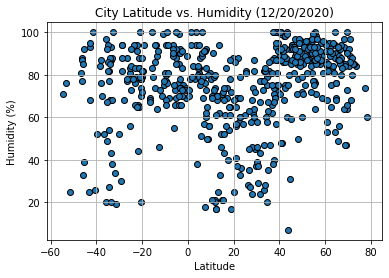

In [17]:
# Scatter plot for latitude vs humidity
x_values = city_data['Lat']
y_values = city_data['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Humidity (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig2.png")

plt.show()

Latitude vs. Cloudiness Plot

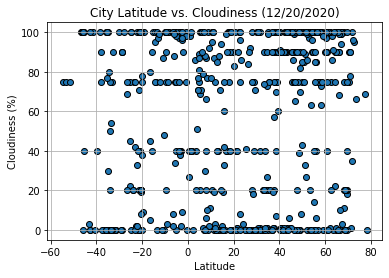

In [19]:
# Scatter plot for latitude vs cloudiness
x_values = city_data['Lat']
y_values = city_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig3.png")

plt.show()

Latitude vs. Wind Speed Plot

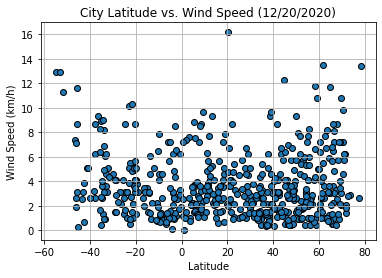

In [37]:
# Scatter plot for latitude vs wind speed
x_values = city_data['Lat']
y_values = city_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig4.png")

plt.show()

Linear Regression

Northern Hemisphere - Max Temp (C) vs. Latitude Linear Regression

In [28]:
northern_hemi = city_data.loc[city_data['Lat'] >= 0]

The r-value is: 0.7560796008996293


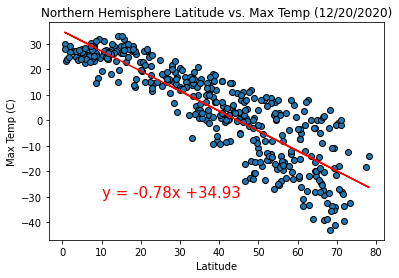

In [33]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']

# Linear regression on max temp vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for max temp vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Max Temp (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Southern Hemisphere - Max Temp (C) vs. Latitude Linear Regression

In [29]:
southern_hemi = city_data.loc[city_data['Lat'] <= 0]

The r-value is: 0.3595900863018475


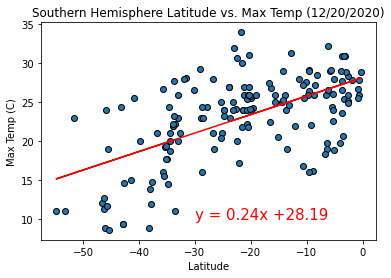

In [34]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']

# Linear regression on max temp vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for max temp vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Max Temp (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13117195729862538


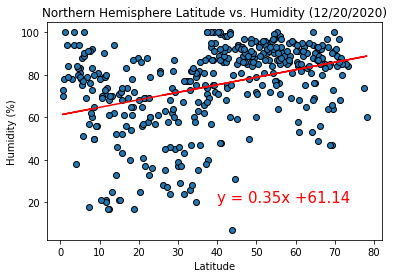

In [36]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']

# Linear regression on humidity vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for humidity vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Humidity (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06092820038880241


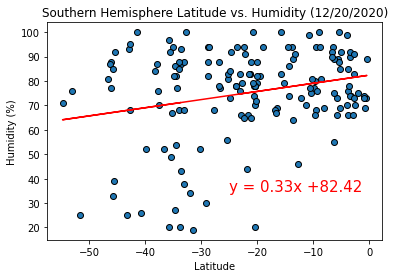

In [43]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']

# Linear regression on humidity vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for humidity vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Humidity (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,35),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.022629934226189787


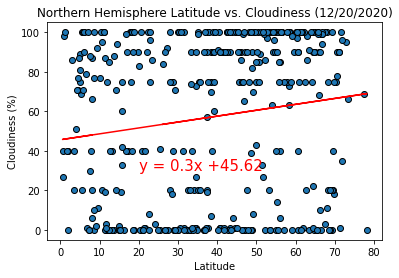

In [41]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']

# Linear regression on cloudiness vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for cloudiness vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Cloudiness (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.027791276000392173


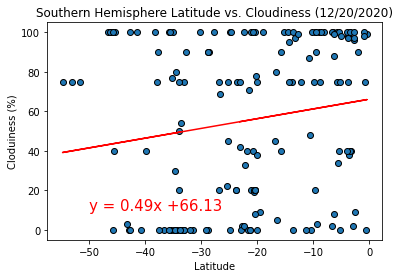

In [48]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']

# Linear regression on cloudiness vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for cloudiness vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Cloudiness (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloduiness (%)')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Northern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-value is: 0.008816092480630089


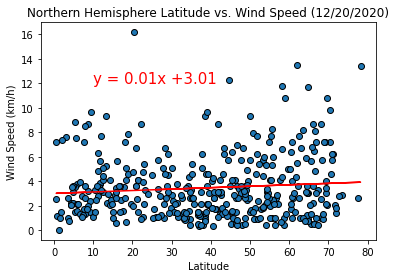

In [45]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']

# Linear regression on wind speed vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for wind speed vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Wind Speed (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Southern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-value is: 0.1290048912170783


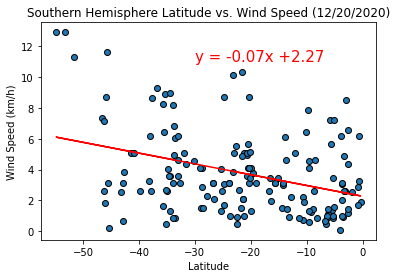

In [51]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']

# Linear regression on wind speed vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for wind speed vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Wind Speed (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()